In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
dir(Base)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 'classes',
 'metadata',
 'prepare']

In [7]:
# Save references to each table
Base.classes.keys()

['measurement', 'station']

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
Measurement = Base.classes.measurement

In [12]:
# Find the earliest date in the data set.
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [13]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()


[('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-02'

In [15]:

# Starting from the most recent data point in the database. 



# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.station, Measurement.date, Measurement.prcp] 
sel       


In [17]:
results = session.query(Measurement.station, Measurement.date, Measurement.prcp).all()
results

[('USC00519397', '2010-01-01', 0.08),
 ('USC00519397', '2010-01-02', 0.0),
 ('USC00519397', '2010-01-03', 0.0),
 ('USC00519397', '2010-01-04', 0.0),
 ('USC00519397', '2010-01-06', None),
 ('USC00519397', '2010-01-07', 0.06),
 ('USC00519397', '2010-01-08', 0.0),
 ('USC00519397', '2010-01-09', 0.0),
 ('USC00519397', '2010-01-10', 0.0),
 ('USC00519397', '2010-01-11', 0.01),
 ('USC00519397', '2010-01-12', 0.0),
 ('USC00519397', '2010-01-14', 0.0),
 ('USC00519397', '2010-01-15', 0.0),
 ('USC00519397', '2010-01-16', 0.0),
 ('USC00519397', '2010-01-17', 0.0),
 ('USC00519397', '2010-01-18', 0.0),
 ('USC00519397', '2010-01-19', 0.0),
 ('USC00519397', '2010-01-20', 0.0),
 ('USC00519397', '2010-01-21', 0.0),
 ('USC00519397', '2010-01-22', 0.0),
 ('USC00519397', '2010-01-23', 0.0),
 ('USC00519397', '2010-01-24', 0.01),
 ('USC00519397', '2010-01-25', 0.0),
 ('USC00519397', '2010-01-26', 0.04),
 ('USC00519397', '2010-01-27', 0.12),
 ('USC00519397', '2010-01-28', 0.0),
 ('USC00519397', '2010-01-30', 

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(results).set_index("date")
precip_df.head()

,station,prcp
date,,
2010-01-01,USC00519397,0.08
2010-01-02,USC00519397,0.00
2010-01-03,USC00519397,0.00
2010-01-04,USC00519397,0.00
2010-01-06,USC00519397,NaN


In [19]:
# Sort the dataframe by date
precip_df.sort_values(by='date')
precip_df

,station,prcp
date,,
2010-01-01,USC00519397,0.08
2010-01-02,USC00519397,0.00
2010-01-03,USC00519397,0.00
2010-01-04,USC00519397,0.00
2010-01-06,USC00519397,NaN
...,...,...
2017-08-19,USC00516128,0.09
2017-08-20,USC00516128,NaN
2017-08-21,USC00516128,0.56


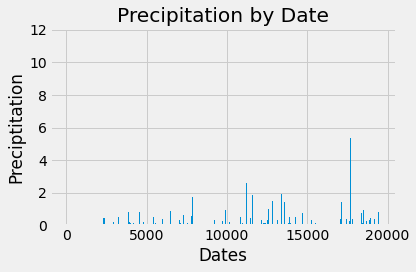

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
y_axis = precip_df["prcp"]
x_axis = np.arange(0,len(precip_df))

plt.title("Precipitation by Date")
plt.xlabel("Dates")
plt.ylabel("Preciptitation")

plt.bar(x_axis, y_axis)
plt.tight_layout()
plt.show()

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [22]:
Station = Base.classes.station

In [23]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [24]:
# Design a query to calculate the total number stations in the dataset
total_count = session.query(Station).distinct().count()
print(total_count)

9


In [25]:
session.query(Measurement.station, Station.station).limit(100).all()

[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC0051

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()